# NUMPY

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy.ma as ma

#### Write a function which standardizes the values in a given numeric vector, i.e., rescales its elements so that the resulting vector is of mean and standard deviation of 1. Note: this is also called "Z-score computing". (lavorare su ndim=1)

In [51]:
matrice = np.random.randint(1, 100, 10)

def standardize(vector):
    
    z_score = (vector - np.mean(vector))/np.std(vector)
    mean = np.mean(z_score)
    std = np.std(z_score)
    return z_score, mean, std
        
(standardize(matrice))

(array([-1.00269677,  1.74327779, -0.6282457 , -0.00416057,  0.57831889,
        -1.58517623,  0.28707916, -0.71145705,  1.45203807, -0.12897759]),
 -6.661338147750939e-17,
 1.0)

#### Write a function which standardizes the values in each column of a given matrix (separately). (lavorare su ndim=2)

In [52]:
matrice = np.random.randint(1, 100, size= (3, 4))

def standardize(vector):
    
    mean = np.mean(vector, axis=0)
    std = np.mean(vector, axis=0)
    z_score = (vector-mean)/std
    return matrice, mean, std, z_score

standardize(matrice)

(array([[70, 71, 91, 64],
        [11, 68, 86, 12],
        [ 2, 83, 36, 23]]),
 array([27.66666667, 74.        , 71.        , 33.        ]),
 array([27.66666667, 74.        , 71.        , 33.        ]),
 array([[ 1.53012048, -0.04054054,  0.28169014,  0.93939394],
        [-0.60240964, -0.08108108,  0.21126761, -0.63636364],
        [-0.92771084,  0.12162162, -0.49295775, -0.3030303 ]]))

In [53]:
matrice = np.random.randint(1, 100, size= (3, 4))

def standardize(vector):
    
    return (vector - np.mean(vector, axis=0))/np.std(vector, axis=0)

standardize(matrice)

array([[-1.28250306,  0.24735697, -0.31822291, -1.38526662],
       [ 1.15738081, -1.32954369, -1.03422447,  0.93916381],
       [ 0.12512225,  1.08218672,  1.35244738,  0.44610281]])

### 1) Pearson linear correlation coefficient

Calculate the linearity in the correlation between two groups of variables. As the values of X increase, the values of Y also increase (rPearson tends towards 1). As the values of X decrease, the values of Y increase (rPearson tends towards -1). If the value of the Pearson correlation coefficient tends towards the extremes (-1, +1), we speak of a strong correlation. Conversely, we speak of weak or no correlation if the directionality of the variance of X values is opposite to the directionality of the variance of Y values.

#### Pearson coefficient use randomic values

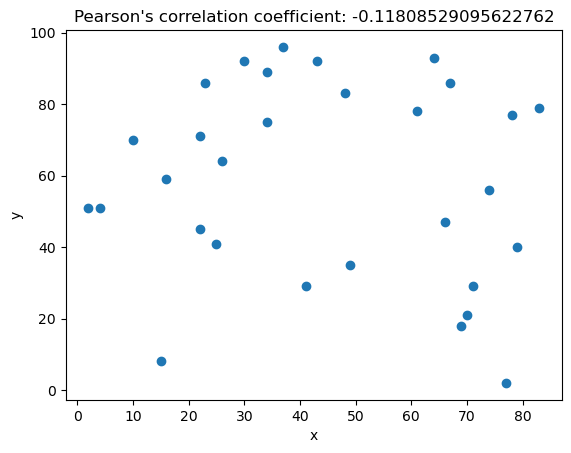

In [54]:
n = 30
x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)

def rho(x, y):
    r = np.corrcoef(x, y)
    return r[0,1]

plt.scatter(x, y)
plt.title(f"Pearson's correlation coefficient: {rho(x, y)}")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Example of a perfect negative correlation

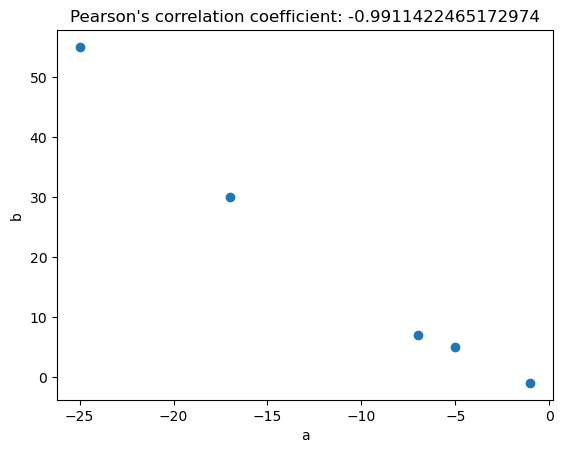

In [55]:
a = [-1, -5, -7, -17, -25]
b = [-1, 5, 7, 30, 55]

def r(x, y):
    
    r = np.corrcoef(x, y)
    return r[0, 1]

r(a, b)

plt.scatter(a, b)
plt.title(f"Pearson's correlation coefficient: {r(a, b)}")
plt.xlabel('a')
plt.ylabel('b')

plt.show()

#### Example of a perfect positive correlation

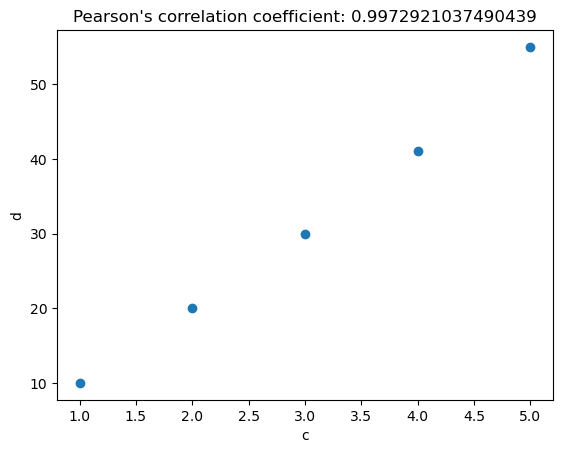

In [56]:
c = [1, 2, 3, 4, 5]
d = [10, 20, 30, 41, 55]

def rho(x, y):
    
    r = np.corrcoef(x, y)
    return r[0, 1]

rho(c, d)

plt.scatter(c, d)
plt.title(f"Pearson's correlation coefficient: {rho(c, d)}")
plt.xlabel('c')
plt.ylabel('d')
plt.show()

### 2) Spearman rank correlation coefficient

###### Pearson correlation assumes that the data we are comparing is normally distributed. When that assumption is not true, the correlation value is reflecting the true association. Spearman correlation does not assume that data is from a specific distribution, so it is a non-parametric correlation measure. Spearman correlation is also known as Spearman’s rank correlation as it computes correlation coefficient on rank values of the data.

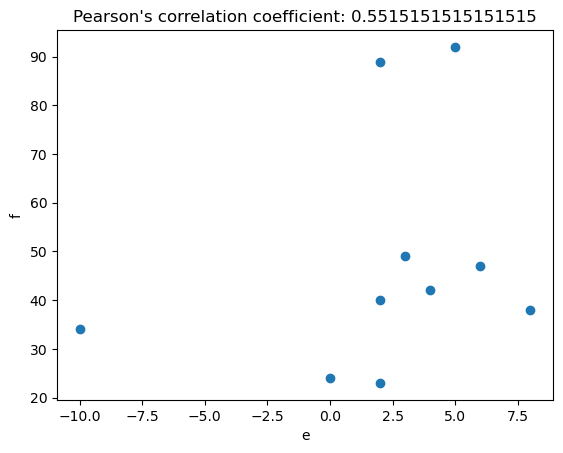

In [57]:
n = 10
e = np.random.randint(-10, 10, n)
f = np.random.randint(1, 100, n)


def r_spearman(x, y):
    
    x_rank = np.argsort(np.argsort(x))
    y_rank = np.argsort(np.argsort(y))
    
    r = np.corrcoef(x_rank, y_rank)
    return r[0, 1]

r_spearman(e, f)

plt.scatter(e, f)
plt.title(f"Pearson's correlation coefficient: {r_pearson(e, f)}")
plt.xlabel('e')
plt.ylabel('f')
plt.show()

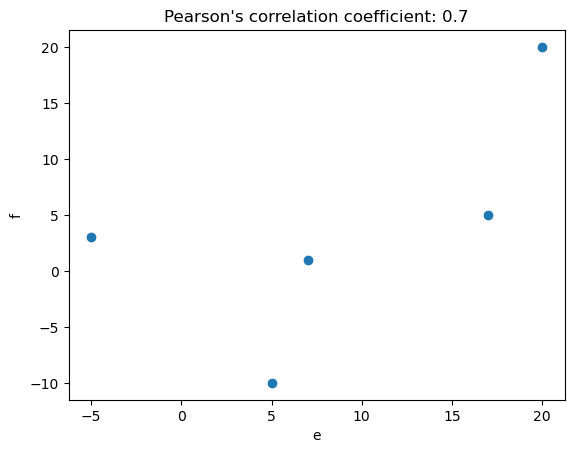

In [58]:
e = [7, 5, 20, 17, -5]
f = [1, -10, 20, 5, 3]


def r_pearson(x, y):
    
    x_rank = np.argsort(np.argsort(x))
    y_rank = np.argsort(np.argsort(y))
    
    r = np.corrcoef(x_rank, y_rank)
    return r[0, 1]

r_pearson(e, f)

plt.scatter(e, f)
plt.title(f"Pearson's correlation coefficient: {r_pearson(e, f)}")
plt.xlabel('e')
plt.ylabel('f')
plt.show()

### 3) Given a matrix with n rows and m columns (e.g., the first 4 rowsfrom the iris dataset), compute the correlation matrix, i.e., an m x m matrix C with C(i,j) denoting the Pearson coefficient for the i-th and the j-th column.

##### 3.1 Print all values in [-2, -1] U [1, 2] FOR LOOP

In [59]:
np.random.seed(6)
x = np.sort(np.round(np.random.normal(size=20), 2))
print(f"\nNumpy array is: \n{np.sort(x)}\n")
values_in_range = []
for value in x:
    if -2 < value < -1 or 1 < value < 2:
        values_in_range.append(value)
        
print(f"The values of x in [-2, -1] U [1, 2] are {values_in_range}\n")


Numpy array is: 
[-2.49 -1.51 -0.9  -0.43 -0.34 -0.31 -0.16  0.08  0.11  0.13  0.22  0.6
  0.63  0.73  0.81  0.91  1.13  1.24  1.64  2.63]

The values of x in [-2, -1] U [1, 2] are [-1.51, 1.13, 1.24, 1.64]



In [15]:
x[(x<=-1)&(x>=-2)|(x>=1)&(x<=2)]

array([-1.51,  1.13,  1.24,  1.64])

##### 3.2 Print the number and the proportion of nonnegative elements in x FOR LOOP

In [60]:
count = 0
for value in x:
    if value >= 0:
        count += 1

proportion = count/len(x)
        
print(f"\n{x}\n\nThe number of nonnegative elements in x is {count} and the proportion is {proportion}\n")


[-2.49 -1.51 -0.9  -0.43 -0.34 -0.31 -0.16  0.08  0.11  0.13  0.22  0.6
  0.63  0.73  0.81  0.91  1.13  1.24  1.64  2.63]

The number of nonnegative elements in x is 13 and the proportion is 0.65



In [25]:
np.random.seed(6)
x = np.sort(np.round(np.random.normal(size=20), 2))
nonegative = np.sum(x>=0)
print(nonegative)

prop = np.mean(x>=0)
prop

13


0.65

#### 3.3 Compute the arithmetic mean of absolute values.

In [26]:
mean_absolute_values = np.mean(abs(x))
print(f"\nThe arithmetic mean of absolute values in x is {mean_absolute_values}\n")


The arithmetic mean of absolute values in x is 0.85



#### 3.4.1 Determine elements in x which are the least and the most distant from 0.

In [62]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

print(f"\nx is the 'Least' distant from 0 at the value {find_nearest(x, 0)}\n")


x is the 'Least' distant from 0 at the value 0.08



#### 3.4.2 Determine elements in x which are the most and the most distant from 0.

In [63]:
def find_furthest(array, value):
    idx = (np.abs(array - value)).argmax()
    return array[idx]

print(f"\nx is the 'Most' distant from 0 at the value {find_furthest(x, 0)}\n")


x is the 'Most' distant from 0 at the value 2.63



#### 3.5 Determine 3 elements in x which are the most distant from the arithmetic mean of x.

In [64]:
mean = np.mean(x)
distance = (np.abs(x - mean).argmax())
x1 = np.delete(x, [distance])
distance1 =(np.abs(x1 - mean).argmax())
x2 = np.delete(x1, [distance1])
distance2 =(np.abs(x2 - mean).argmax())

print(f"\nThe 3 elements in x which are the most distant from the arithmetic mean of x {mean}\nAre {x[distance], x1[distance1], x2[distance2]}\n")


The 3 elements in x which are the most distant from the arithmetic mean of x 0.23599999999999993
Are (-2.49, 2.63, -1.51)



In [32]:
vals = x[np.argsort(abs(x-np.mean(x)))][-3:]
vals

array([-1.51,  2.63, -2.49])

#### 3.6 Create a vector x2, which is a version of x with all outliers removed, i.e., all observations x of i such that:                                             x of i is not in [Q1 - 1.5(Q3 - Q1), Q3 + 1.5(Q3 - Q1)]      nb. gli estremi sono inclusi per via delle [] where (Q3 - Q1) denotes the interquartile range and Q1 and Q3 denote the 1st and 3rd sample quartiles, respectively.

In [65]:
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)
nIQR = ((Q3-Q1)*3)/2
low_extreme = Q1-nIQR
high_extreme = Q3+nIQR

x2 = np.array([])

mask = np.sort(ma.masked_inside(x, low_extreme, high_extreme))
is_mask = np.extract(x, mask)

for n in is_mask:
    if n != 0:
        x2 = np.append(x2, n)
    
print(f"\nThe vector x2 is \n{x2}\nbecause the values of x are not in [{low_extreme}, {high_extreme}]") 


The vector x2 is 
[-2.49  2.63]
because the values of x are not in [-2.04625, 2.56375]


In [66]:
#Print all values in [-2, -1] U [1, 2] FOR LOOP
np.random.seed(6)
x = np.round(np.random.normal(size=20), 2)
print(f"Numpy array is: \n{np.sort(x)}\n")
values_in_range = []
for value in x:
    if -2 < value < -1 or 1 < value < 2:
        values_in_range.append(value)
        
print(f"1) The values of x in [-2, -1] U [1, 2] are {values_in_range}\n")

#Print the number and the proportion of nonnegative elements in x FOR LOOP
count = 0
for value in x:
    if value >= 0:
        count += 1

proportion = count/len(x)
        
print(f"2) The number of nonnegative elements in x is {count} and the proportion is {proportion}\n")

#Compute the arithmetic mean of absolute values.
absolute_values = abs(x)
mean_absolute_values = np.mean(absolute_values)
print(f"3) The arithmetic mean of absolute values in x is {mean_absolute_values}\n")

#Determine elements in x which are the least and the most distant from 0.
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_furthest(array, value):
    idx = (np.abs(array - value)).argmax()
    return array[idx]
print(f"4a) x is the  'Least'  distant from 0 at the value {find_nearest(x, 0)}\n4b) x is the  'Most'   distant from 0 at the value {find_furthest(x, 0)}\n")

#Determine 3 elements in x which are the most distant from the arithmetic mean of x.
mean = np.mean(x)
distance = (np.abs(x - mean).argmax())
x1 = np.delete(x, [distance])
distance1 =(np.abs(x1 - mean).argmax())
x2 = np.delete(x1, [distance1])
distance2 =(np.abs(x2 - mean).argmax())
print(f"5) The 3 elements in x which are the most distant from the arithmetic mean of x are {x[distance], x1[distance1], x2[distance2]}\n")

#Create a vector x2, which is a version of x with all outliers removed,i.e., all observations x of i such that, 
# x of i is not in [Q1 - 1.5(Q3 - Q1), Q3 + 1.5(Q3 - Q1)]      nb. gli estremi sono inclusi per via delle []
#where (Q3 - Q1) denotes the interquartile range and Q1 and Q3 denote the 1st and 3rd sample quartiles, respectively.
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)
nIQR = ((Q3-Q1)*3)/2
low_extreme = Q1-nIQR
high_extreme = Q3+nIQR

x2 = np.array([])

mask = np.sort(ma.masked_inside(x, low_extreme, high_extreme))
is_mask = np.extract(x, mask)

for n in is_mask:
    if n != 0:
        x2 = np.append(x2, n)
    
print(f"6) The vector x2 is \n{x2}\nbecause the values of x are not in [{low_extreme}, {high_extreme}]")   

Numpy array is: 
[-2.49 -1.51 -0.9  -0.43 -0.34 -0.31 -0.16  0.08  0.11  0.13  0.22  0.6
  0.63  0.73  0.81  0.91  1.13  1.24  1.64  2.63]

1) The values of x in [-2, -1] U [1, 2] are [1.13, -1.51, 1.64, 1.24]

2) The number of nonnegative elements in x is 13 and the proportion is 0.65

3) The arithmetic mean of absolute values in x is 0.85

4a) x is the  'Least'  distant from 0 at the value 0.08
4b) x is the  'Most'   distant from 0 at the value 2.63

5) The 3 elements in x which are the most distant from the arithmetic mean of x are (-2.49, 2.63, -1.51)

6) The vector x2 is 
[-2.49  2.63]
because the values of x are not in [-2.04625, 2.56375]
